# ECLAT works with a vertical data format.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express  as px
from pyECLAT import ECLAT

In [5]:
df = pd.read_csv("C:/Users/Admin/Machine Learning chapter 5/Unsupervised learning/Association/Market_Basket.csv")
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


In [7]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

In [8]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Transaction      20507 non-null  int64         
 1   Item             20507 non-null  object        
 2   date_time        20507 non-null  datetime64[ns]
 3   period_day       20507 non-null  object        
 4   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 801.2+ KB


In [9]:
df['hour'] = df['date_time'].dt.hour
df['date'] = df['date_time'].dt.date
df['month'] = df['date_time'].dt.month
df['year'] = df['date_time'].dt.year

df.head()    

,Transaction,Item,date_time,period_day,weekday_weekend,hour,date,month,year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,9,2016-10-30,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016


findfont: Font family ['san serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['san serif'] not found. Falling back to DejaVu Sans.


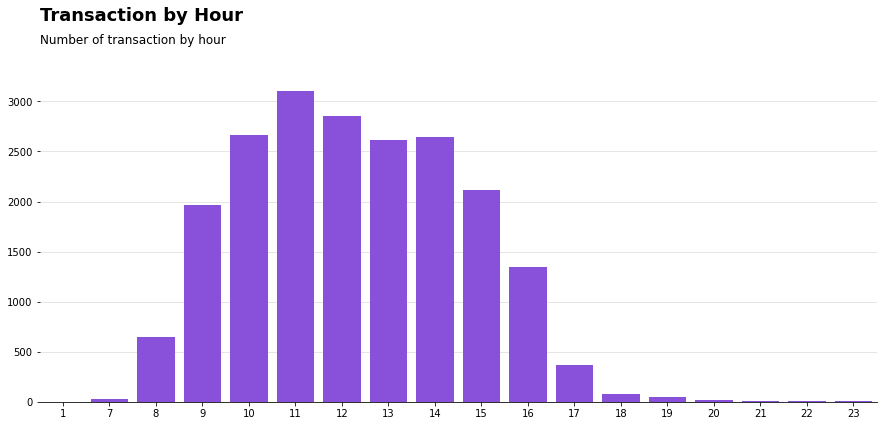

In [10]:

fig, hourT = plt.subplots(figsize=(15, 6))


hourT = sns.countplot(data=df, x='hour', color='#8539F0')
hourT.set_title("Transaction by Hour", loc='left', fontweight='bold', fontfamily = 'san serif', size=18, y=1.15)
hourT.text(0,1.1, 'Number of transaction by hour', size=12, fontfamily='san serif',transform=hourT.transAxes)


for i in ['left', 'top', 'right']:
    hourT.spines[i].set_visible(False)

hourT.grid(axis='y', linestyle='-', alpha=0.4 )
hourT.set_axisbelow(True)

hourT.set_xlabel(None)
hourT.set_ylabel(None)

plt.show();

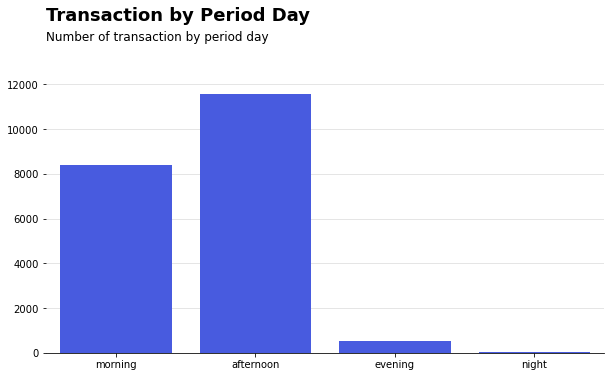

In [11]:
fig, period = plt.subplots(figsize=(10,5))

period = sns.countplot(data=df, x='period_day', color='#2F48F8')
period.set_title("Transaction by Period Day", y=1.20, size=18, fontfamily='san serif', loc='left', fontweight='bold')
period.text(0,1.15, "Number of transaction by period day", transform = period.transAxes, size=12)

for i in ['left', 'top', 'right']:
    period.spines[i].set_visible(False)

period.grid(axis='y', alpha=0.4)
period.set_axisbelow(True)

period.set_xlabel(None)
period.set_ylabel(None)

plt.show();

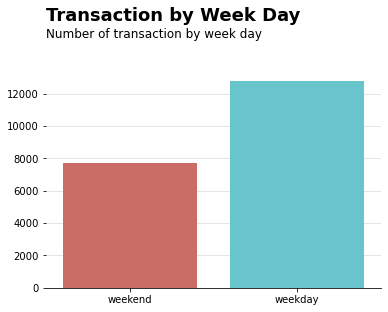

In [12]:
fig, weekday = plt.subplots(figsize=(6,4))

weekday = sns.countplot(data=df, x='weekday_weekend', palette='hls')
weekday.set_title("Transaction by Week Day", loc='left', fontweight='bold', size=18, fontfamily='san serif', y=1.2)
weekday.text(0,1.15, "Number of transaction by week day", transform = weekday.transAxes, size=12)

for i in ['left','top','right']:
    weekday.spines[i].set_visible(False)

weekday.grid(alpha=0.4, axis='y')
weekday.set_axisbelow(True)

weekday.set_xlabel(None)
weekday.set_ylabel(None)




plt.show()

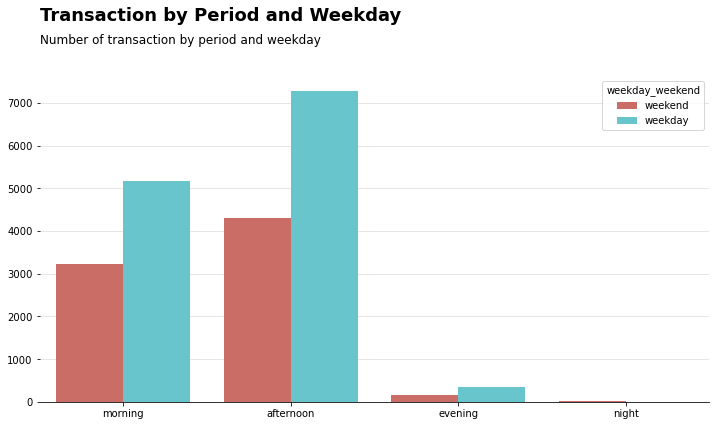

In [13]:
fig, weekday_period = plt.subplots(figsize=(12,6))

weekday_period = sns.countplot(data=df, x='period_day', hue='weekday_weekend', palette='hls')
weekday_period.set_title("Transaction by Period and Weekday", loc='left', y=1.15, fontsize=18, fontweight='bold')
weekday_period.text(0,1.10, "Number of transaction by period and weekday", fontsize=12, transform=weekday_period.transAxes)


for i in ['left', 'top','right']:
    weekday_period.spines[i].set_visible(False)

weekday_period.grid(axis='y', alpha=0.4)
weekday_period.set_axisbelow(True)

weekday_period.set_xlabel(None)
weekday_period.set_ylabel(None)


plt.show()

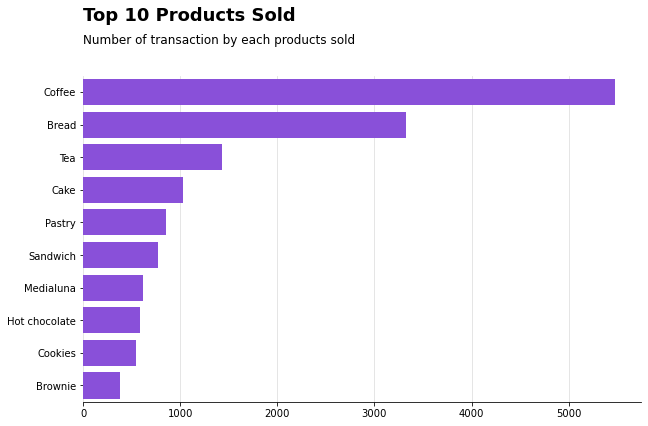

In [14]:
products = df.groupby('Item')['Transaction'].agg('count').sort_values(ascending=False)
products = pd.DataFrame(products)
products.reset_index(inplace=True)


fig, prod = plt.subplots(figsize=(10,6))

prod = sns.barplot(x=products.Transaction[:10], y=products.Item[:10], orient='h', color='#8539F0')
prod.set_title("Top 10 Products Sold", loc='left', y=1.15, fontweight='bold', size='18', fontfamily='san serif')
prod.text(0,1.10, "Number of transaction by each products sold", transform= prod.transAxes, size=12)

for i in ['left', 'top', 'right']:
    prod.spines[i].set_visible(False)

prod.grid(axis='x', alpha=0.4)
prod.set_axisbelow(True)

prod.set_xlabel(None)
prod.set_ylabel(None)

plt.show();

In [15]:
df.head()

,Transaction,Item,date_time,period_day,weekday_weekend,hour,date,month,year
0,1,Bread,2016-10-30 09:58:00,morning,weekend,9,2016-10-30,10,2016
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,2016-10-30,10,2016
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016


In [16]:
#20507 total transactions. 
df.shape

(20507, 9)

# As you can see transactions numbers are repeated meaning that in one transaction may be more than one item bought. 

In [17]:
df[df.Transaction == 3]

,Transaction,Item,date_time,period_day,weekday_weekend,hour,date,month,year
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016
5,3,Cookies,2016-10-30 10:07:00,morning,weekend,10,2016-10-30,10,2016


# For ECLAT we need to order the dataframe into vertical format. 

In [18]:
df_eclat = df[['Transaction','Item']]
result = df_eclat.groupby('Transaction')['Item'].apply(list).to_dict()
result

{1: ['Bread'],
 2: ['Scandinavian', 'Scandinavian'],
 3: ['Hot chocolate', 'Jam', 'Cookies'],
 4: ['Muffin'],
 5: ['Coffee', 'Pastry', 'Bread'],
 6: ['Medialuna', 'Pastry', 'Muffin'],
 7: ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 8: ['Pastry', 'Bread'],
 9: ['Bread', 'Muffin'],
 10: ['Scandinavian', 'Medialuna'],
 11: ['Bread', 'Medialuna', 'Bread'],
 12: ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 13: ['Basket', 'Bread', 'Coffee'],
 14: ['Bread', 'Medialuna', 'Pastry'],
 15: ['Mineral water', 'Scandinavian'],
 16: ['Bread', 'Medialuna', 'Coffee'],
 17: ['Hot chocolate'],
 18: ['Farm House'],
 19: ['Farm House', 'Bread'],
 20: ['Bread', 'Medialuna'],
 21: ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 22: ['Jam'],
 23: ['Scandinavian', 'Muffin'],
 24: ['Bread'],
 25: ['Scandinavian'],
 26: ['Fudge'],
 27: ['Scandinavian'],
 28: ['Coffee', 'Bread'],
 29: ['Bread', 'Jam'],
 30: ['Bread'],
 31: ['Basket'],
 32: ['Scandinavian', 'Muffin'],
 33: ['Coffee'],
 34: ['Coffee', 'Muffin'],
 35

In [19]:
df_ec = pd.DataFrame(list(result.items()), columns=['Transaction', 'Item'])
df_ec.head()

,Transaction,Item
0,1,[Bread]
1,2,"[Scandinavian, Scandinavian]"
2,3,"[Hot chocolate, Jam, Cookies]"
3,4,[Muffin]
4,5,"[Coffee, Pastry, Bread]"


In [20]:
df_item = df_eclat.groupby(by='Item')['Transaction'].apply(lambda x:', '.join(map(str, x))).reset_index()
df_item.head()

,Item,Transaction
0,Adjustment,938
1,Afternoon with the baker,"4263, 4322, 4405, 4534, 4541, 4723, 4724, 4725..."
2,Alfajores,"223, 230, 242, 247, 267, 286, 288, 300, 330, 3..."
3,Argentina Night,"7981, 8639, 9265, 9555, 9556, 9578, 9579"
4,Art Tray,"850, 853, 966, 1004, 1072, 1248, 1273, 1337, 1..."


In [21]:
lista = df_ec['Item'].tolist()
lista[:5]

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread']]

In [22]:
data = pd.DataFrame(lista)
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Bread,None,None,None,None,None,None,None,None,None,None
1,Scandinavian,Scandinavian,None,None,None,None,None,None,None,None,None
2,Hot chocolate,Jam,Cookies,None,None,None,None,None,None,None,None
3,Muffin,None,None,None,None,None,None,None,None,None,None
4,Coffee,Pastry,Bread,None,None,None,None,None,None,None,None


In [23]:

# create an instance of eclat
my_eclat = ECLAT(data=data, verbose=True)
my_eclat

100%|█████████████████████████████████████████████████████████████████████████████████| 95/95 [00:00<00:00, 916.85it/s]


In [24]:
my_eclat.df_bin

,Chocolates,Half slice Monster,Gift voucher,Scone,Duck egg,Smoothies,Vegan Feast,Lemon and coconut,Crisps,Truffles,...,Raw bars,NaN,Tacos/Fajita,Hot chocolate,Focaccia,Mineral water,Medialuna,Alfajores,Extra Salami or Feta,Muesli
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9461,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9462,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9463,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# count items in each row (Transaction)
items_per_transaction =  my_eclat.df_bin.astype(int).sum(axis=1)

items_per_transaction

0       1
1       1
2       3
3       1
4       3
       ..
9460    1
9461    4
9462    4
9463    2
9464    1
Length: 9465, dtype: int64

In [26]:
# the item shoud appear at least at 3% of transactions
min_support = 3/100

# start from transactions containing at least 2 items
min_combination = 2

# up to maximum items per transaction
max_combination = max(items_per_transaction)

In [24]:
#I choose max_combination of 3 on purpose to run the kernel faster and make less associations for demonstration. But we could habe choosen  max(items_per_transaction) 
indices, suporte = my_eclat.fit(min_support= 0.03, min_combination= min_combination, max_combination= 3)

Combination 2 by 2


136it [00:02, 64.32it/s]


Combination 3 by 3


680it [00:10, 64.09it/s]


In [25]:
suporte

{'Bread & Coffee': 0.09001584786053883,
 'Cake & Coffee': 0.054727945060750134,
 'Coffee & Pastry': 0.04754358161648178,
 'Coffee & Medialuna': 0.03518225039619651,
 'Coffee & Sandwich': 0.038246170100369785,
 'Coffee & Tea': 0.049867934495509775}

# The end result is frequent items with their support. If you were waiting for other measures like lift or confidence… sorry, the ECLAT just give us the support.

# Bread & Coffee have a combined support of 9%, Cake & Coffee 5.4% and so on...

# FP GROWTH Model: 

In [27]:
df_fp = df[['Transaction','Item']]
df_fp = df_fp.groupby('Transaction')['Item'].apply(list).to_list()

In [28]:
df_fp

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry'],
 ['Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 

In [28]:
!pip install mlxtend -q
%pip install mlxtend --upgrade -q

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Admin\\anacondalastone\\Lib\\site-packages\\~-mpy.libs\\libopenblas64__v0.3.23-293-gc2f4bdbb-gcc_10_3_0-2bde3a66a51006b2b53eb373ff767a3f.dll'
Consider using the `--user` option or check the permissions.



Note: you may need to restart the kernel to use updated packages.


In [1]:
from mlxtend.preprocessing import TransactionEncoder

In [29]:
# instantiate a transaction encoder
transEncoder = TransactionEncoder()

In [30]:
# fit the transaction encoder using the list of transaction
transEncoder.fit(df_fp)

TransactionEncoder()

In [31]:
# transform the list of transaction tuples into an array of encoded transactions
enctrans = transEncoder.transform(df_fp)

In [32]:
enctrans

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [33]:
# convert the array of encoded transactions into a dataframe
df_fp_final = pd.DataFrame(enctrans, columns=transEncoder.columns_)
df_fp_final.head()

,Adjustment,Afternoon with the baker,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [36]:
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

In [37]:
# List of frequency itemset
frequent_itemsets = fpgrowth(df_fp_final, min_support=0.01, use_colnames = True)
frequent_itemsets.head(10)

,support,itemsets
0,0.327205,(Bread)
1,0.029054,(Scandinavian)
2,0.058320,(Hot chocolate)
3,0.054411,(Cookies)
4,0.015003,(Jam)
5,0.038457,(Muffin)
6,0.478394,(Coffee)
7,0.086107,(Pastry)
8,0.061807,(Medialuna)
9,0.142631,(Tea)


In [34]:
# compute and print the association rules
from mlxtend.frequent_patterns import association_rules

In [41]:
#note that we use the lift as the metric threhold. 
association_rules_df = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
association_rules_df

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
1,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
2,(Coffee),(Hot chocolate),0.478394,0.058320,0.029583,0.061837,1.060311,0.001683,1.003749,0.109048
3,(Hot chocolate),(Coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553,0.060403
4,(Bread),(Hot chocolate),0.327205,0.058320,0.013418,0.041007,0.703144,-0.005665,0.981947,-0.385564
...,...,...,...,...,...,...,...,...,...,...
69,(Toast),(Coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
70,(Coffee),(Scone),0.478394,0.034548,0.018067,0.037765,1.093107,0.001539,1.003343,0.163296
71,(Scone),(Coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366,0.088224
72,(Coffee),(Spanish Brunch),0.478394,0.018172,0.010882,0.022747,1.251766,0.002189,1.004682,0.385594


In [42]:
association_rules_df.sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
47,(Cake),"(Tea, Coffee)",0.103856,0.049868,0.010037,0.096643,1.937977,0.004858,1.051779,0.540090
42,"(Tea, Coffee)",(Cake),0.049868,0.103856,0.010037,0.201271,1.937977,0.004858,1.121962,0.509401
6,(Hot chocolate),(Cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236
7,(Cake),(Hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
38,(Tea),(Cake),0.142631,0.103856,0.023772,0.166667,1.604781,0.008959,1.075372,0.439556
...,...,...,...,...,...,...,...,...,...,...
31,(Bread),(Tea),0.327205,0.142631,0.028104,0.085890,0.602181,-0.018566,0.937927,-0.495438
0,(Coffee),(Bread),0.478394,0.327205,0.090016,0.188163,0.575059,-0.066517,0.828731,-0.586210
1,(Bread),(Coffee),0.327205,0.478394,0.090016,0.275105,0.575059,-0.066517,0.719561,-0.523431
49,"(Coffee, Cake)",(Bread),0.054728,0.327205,0.010037,0.183398,0.560497,-0.007870,0.823895,-0.453411


# For example buy FIRST a Cake & after (Tea, Coffee) together and viceversa  has the maximum lift of 1.937977

# The support tells us the number of times, or percentage, that the products co-occur.The confidence tells us the number of times that a rule occurs. This can be stated differently as the conditional probability of the right-hand side given the left-hand side. The lift gives us the strength of association.